In [1]:
scores = '../out/ko_scores.txt'
dev = '../out/deviating.tsv'

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [3]:
import numpy as np
import pandas as pd

In [51]:
m = pd.read_table(scores, index_col=[0, 2, 1])
m['phenotype'] = m['qvalue'] < 0.05
p = m.reset_index().set_index('gene').loc[genes].groupby('condition').sum()['phenotype']

In [5]:
d = pd.read_table(dev, index_col=[4, 5, 1, 0])

In [6]:
genes = None
for s in {x[0] for x in m.index}:
    gs = {x[0] for x in m.loc[s].index}
    if genes is None:
        genes = gs
    else:
        genes = genes.intersection(gs)
    print(s, len(gs))
print('')
print('total', len(genes))
genes = sorted(genes)

Y55 4190
S288C 4889
YPS 4093
UWOP 4014

total 3786


In [7]:
res = []
for s1, s2 in {tuple(x[:2])
               for x in d.index}:
    v1 = m.loc[s1].loc[genes]
    v1 = v1[~v1.index.duplicated()].dropna()
    idx1 = set(v1[v1['phenotype']].index)
    v2 = m.loc[s2].loc[genes]
    v2 = v2[~v2.index.duplicated()].dropna()
    idx2 = set(v2[v2['phenotype']].index)
    idx = idx1.union(idx2)
    v = d.loc[(s1, s2), ].loc[sorted(idx)].dropna()
    vs1 = set(v[v['qval'] < 0.01].loc[sorted(idx1)].dropna().index.difference(v[v['qval'] < 0.01].loc[sorted(idx2)].dropna().index))
    vs2 = set(v[v['qval'] < 0.01].loc[sorted(idx2)].dropna().index.difference(v[v['qval'] < 0.01].loc[sorted(idx1)].dropna().index))
    vs3 = set(v[v['qval'] < 0.01].loc[sorted(idx2)].dropna().index.intersection(v[v['qval'] < 0.01].loc[sorted(idx1)].dropna().index))
    vs = idx - vs1 - vs2 - vs3
    res.append(([len(vs1), len(vs), len(vs2), len(vs3)], [s1, s2]))

In [8]:
strains = {y
           for x in d.index
           for y in x[:2]}
palette = sns.color_palette('Set1', len(strains))
cstrains = {x: c
            for x,c in zip(strains, palette)}

/usr/local/lib/python3.6/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


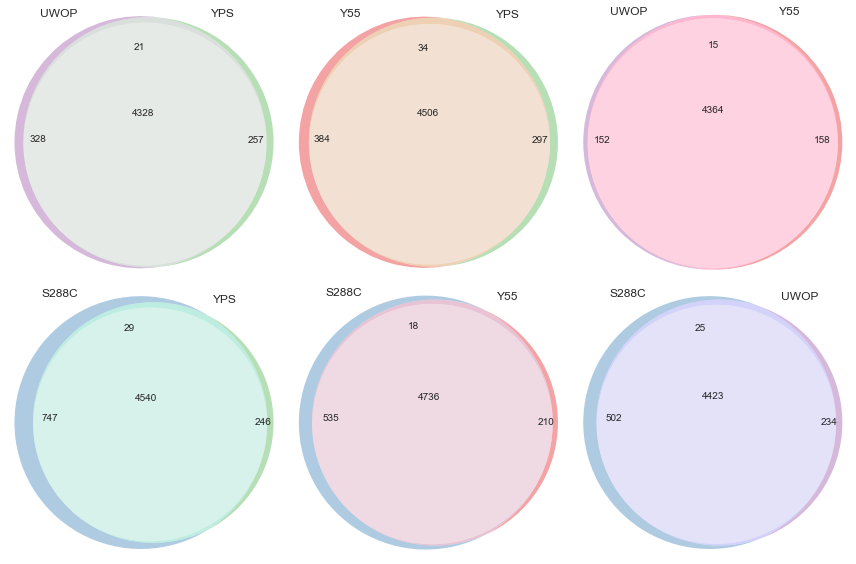

In [9]:
plt.figure(figsize=(12, 8))

for i, t in enumerate(res):
    plt.subplot(2, 3, i+1)
    
    (vs1, vs, vs2, vs3), (s1, s2) = t
    
    _ = venn3([vs1, vs2, vs3,
               0, 0, 0, vs],
              [s1, s2, ''],
              normalize_to=10,
              set_colors=[cstrains[s1],
                          cstrains[s2],
                          'w'])
plt.tight_layout()

In [10]:
v = d.loc[('S288C', 'UWOP'), ].reset_index().set_index('gene').loc[genes]
v[v['qval'] < 0.01].groupby('gene').count()['qval'].sort_values(ascending=False).head()

gene
YJL036W    10
YGR135W    10
YJL168C     8
YBR101C     8
YDR126W     8
Name: qval, dtype: int64

In [11]:
v = d.reset_index().set_index('gene').loc[genes]
v[v['qval'] < 0.01].groupby('gene').count()['qval'].sort_values(ascending=False).head()

gene
YBR101C    31
YBR036C    31
YNR029C    25
YML121W    23
YDR126W    21
Name: qval, dtype: int64

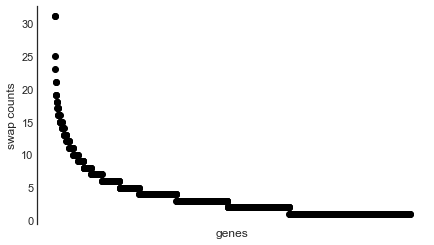

In [27]:
v = d.reset_index().set_index('gene').loc[genes]
v = v[v['qval'] < 0.01].groupby('gene').count()['qval'].sort_values(ascending=False)

plt.figure(figsize=(7, 4))

plt.plot(range(v.shape[0]),
         v,
         'ko')

plt.xticks([])
plt.ylabel('swap counts')
plt.xlabel('genes')
sns.despine(bottom=True);

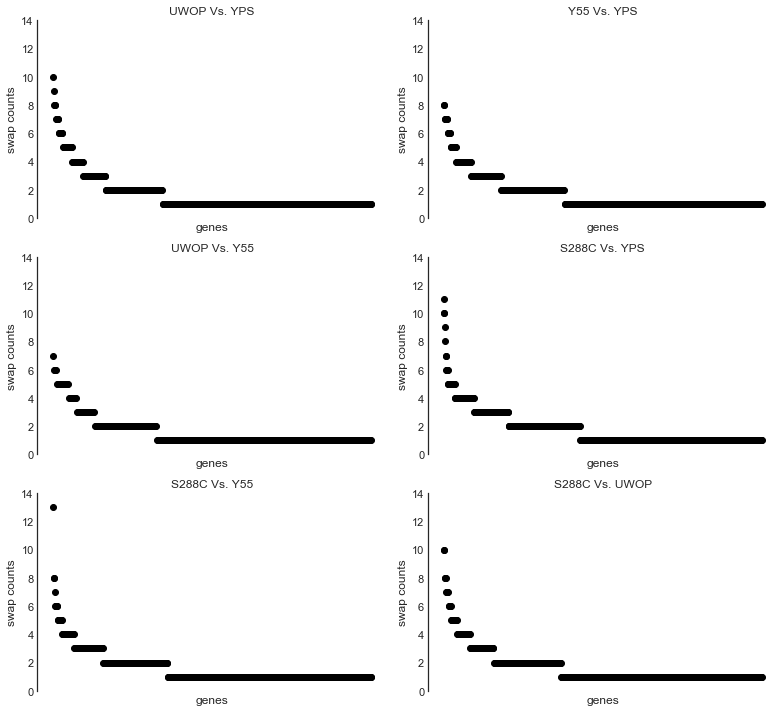

In [33]:
plt.figure(figsize=(11, 10))

i = 1
for s1, s2 in {tuple(x[:2])
               for x in d.index}:
    plt.subplot(3, 2, i)
    
    v = d.loc[(s1, s2), ].reset_index().set_index('gene').loc[genes]
    v = v[v['qval'] < 0.01].groupby('gene').count()['qval'].sort_values(ascending=False)
    
    plt.plot(range(v.shape[0]),
         v,
         'ko')

    plt.ylim(0, 14)
    
    plt.xticks([])
    plt.ylabel('swap counts')
    plt.xlabel('genes')
    plt.title('%s Vs. %s' % (s1, s2))
    
    i += 1

plt.tight_layout()
sns.despine(bottom=True)

In [21]:
v = d.reset_index().set_index('gene').loc[genes]
v = v[v['qval'] < 0.01].groupby('condition').count()['qval'].sort_values(ascending=False)

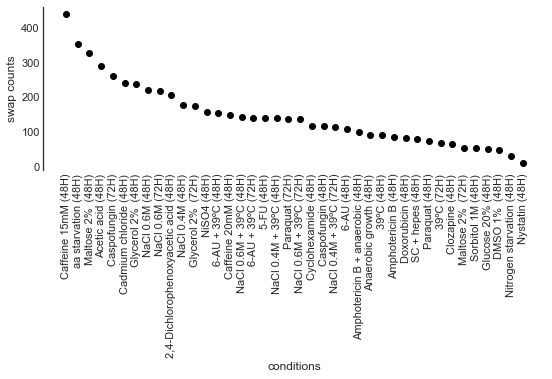

In [26]:
plt.figure(figsize=(9, 3))

plt.plot(range(v.shape[0]),
         v,
         'ko')

plt.xticks(range(v.shape[0]),
           v.index,
           rotation=90)
plt.ylabel('swap counts')
plt.xlabel('conditions')
sns.despine(bottom=True);

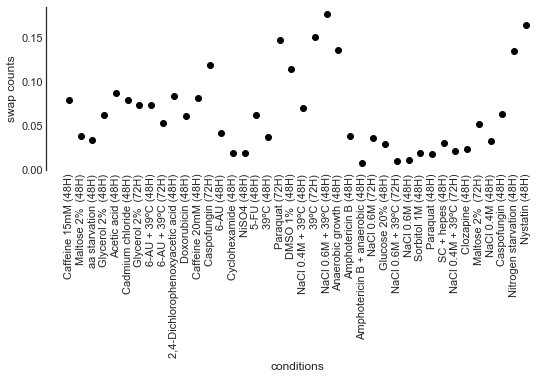

In [52]:
plt.figure(figsize=(9, 3))

plt.plot(range(v.shape[0]),
         v / p,
         'ko')

plt.xticks(range(v.shape[0]),
           v.index,
           rotation=90)
plt.ylabel('swap counts')
plt.xlabel('conditions')
sns.despine(bottom=True);

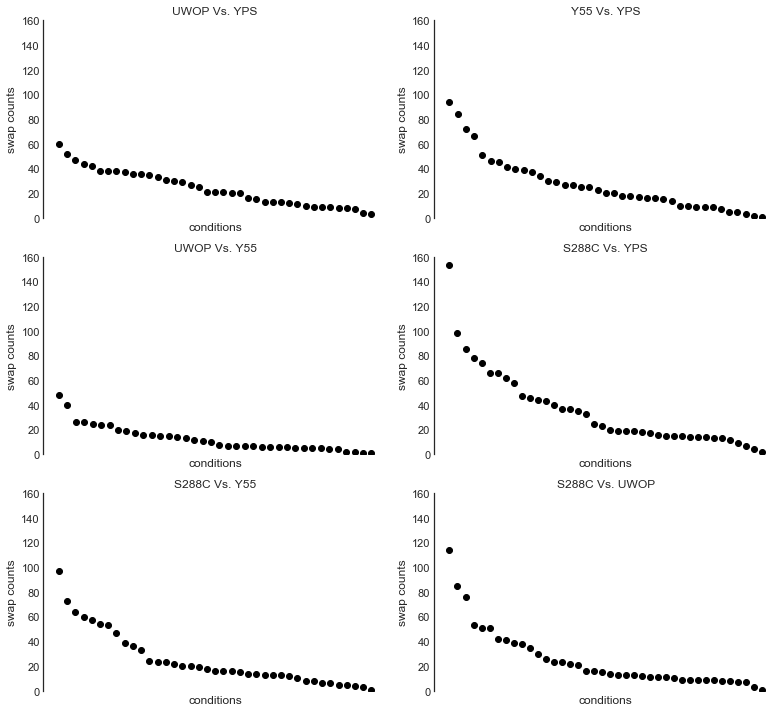

In [35]:
plt.figure(figsize=(11, 10))

i = 1
for s1, s2 in {tuple(x[:2])
               for x in d.index}:
    plt.subplot(3, 2, i)
    
    v = d.loc[(s1, s2), ].reset_index().set_index('gene').loc[genes]
    v = v[v['qval'] < 0.01].groupby('condition').count()['qval'].sort_values(ascending=False)
    
    plt.plot(range(v.shape[0]),
         v,
         'ko')

    plt.ylim(0, 160)
    
    plt.xticks([])
    plt.ylabel('swap counts')
    plt.xlabel('conditions')
    plt.title('%s Vs. %s' % (s1, s2))
    
    i += 1

plt.tight_layout()
sns.despine(bottom=True)

In [121]:
v = d.loc[('S288C', 'UWOP'), ].reset_index().set_index('gene').loc[genes]
v[v['qval'] < 0.01].groupby('condition').count()['qval'].sort_values(ascending=False).head()

condition
Caffeine 15mM (48H)    114
Maltose 2%  (48H)       85
aa starvation (48H)     76
Glycerol 2%  (48H)      53
Acetic acid (48H)       51
Name: qval, dtype: int64

condition
2,4-Dichlorophenoxyacetic acid (48H)    0.023028
39ºC (48H)                              0.021539
39ºC (72H)                              0.019946
5-FU (48H)                              0.016153
6-AU (48H)                              0.012740
Name: phenotype, dtype: float64

In [40]:
pmax

1360.0

In [112]:
(m.groupby('condition').sum()['phenotype'] / m.groupby('condition').count()['phenotype'])

condition
Caspofungin (72H)                       0.070054
Caffeine 15mM (48H)                     0.058448
NaCl 0.6M (72H)                         0.047577
NaCl 0.6M (48H)                         0.042748
NaCl 0.4M (48H)                         0.039830
Acetic acid (48H)                       0.038901
Maltose 2%  (48H)                       0.037234
Caffeine 20mM (48H)                     0.036173
NiSO4 (48H)                             0.033430
Cadmium chloride (48H)                  0.032293
NaCl 0.6M + 39ºC (48H)                  0.031496
Maltose 2%  (72H)                       0.031471
Cyclohexamide (48H)                     0.030780
6-AU + 39ºC (72H)                       0.028925
6-AU + 39ºC (48H)                       0.027957
NaCl 0.6M + 39ºC (72H)                  0.027455
2,4-Dichlorophenoxyacetic acid (48H)    0.027199
Glycerol 2%  (48H)                      0.026581
aa starvation (48H)                     0.024883
39ºC (48H)                              0.023650
Glycerol 2